In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# 이 맷플롯립 인라인을 작성을 해주면 라인 바로 아래에 그림을 그려준다. 창을 띄우지 않고.
%matplotlib inline

In [3]:
df_train = pd.read_csv('../kaggle_study/kaggle_datasets/titanic/train.csv')
df_test = pd.read_csv('../kaggle_study/kaggle_datasets/titanic/test.csv')

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df_train.shape

(891, 12)

In [16]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [35]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


In [37]:
for col in df_test.columns:
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


In [26]:
df_train["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

# df_train['Cabin'].isnull().sum()/df_train['Cabin'].shape[0] * 100
<br>

### df_train['Cabin'].isnull()
이렇게 작성을 하면 df_train 안에 있는 Cabin column안에 있는 객체들 중에 null여부로 bool형 데이터 반환
<br>

### df_train['Cabin'].isnull().sum( )
그리고 .sum()을 해주면 이 반환된 bool형 배열들을 모두 더해준다. 

### df_train['Cabin'].shape[0]
이렇게 출력을 해주면 해당 열의 행렬의 형태를 출력을 해주는데 여기서 행렬의 행에 해당하는 0 idx를 뜻한다.

## 결론
그래서 df_train['Cabin'].isnull().sum( ) 여기서 구한 True(1) 값들의 합을 전체(True, False 모두 합침)를<br>
나눠 주고 100을 곱해주면 전체에서 null값의 비율을 알 수 있다.

In [33]:
df_train['Age'].isnull().sum()/df_train['Age'].shape[0] * 100

19.865319865319865

### misingno 라이브러리
아래와 같은 matrix를 만들 수 있다.<br><br>
iloc은 Index location이라는 pandas 언어. idx로 위치를 찾는거 그냥 파이썬의 인덱스라고 생각해도 괜찮다.<br>
loc은 location이라는 pandas 언어인데 (1,2) 이런식으로 위치를 찾는 것이 아니라 dictionary의 key값 처럼 라벨을 이용해서 불러오는 것이다.<br><br>

figsize는 아래 이미지의 사이즈를 정해주는 것이고 color는 색상을 정해주는 것.<br><br>

막대가 빈칸이 중간 중간에 보이는 것은 null값을 의미.

<Axes: >

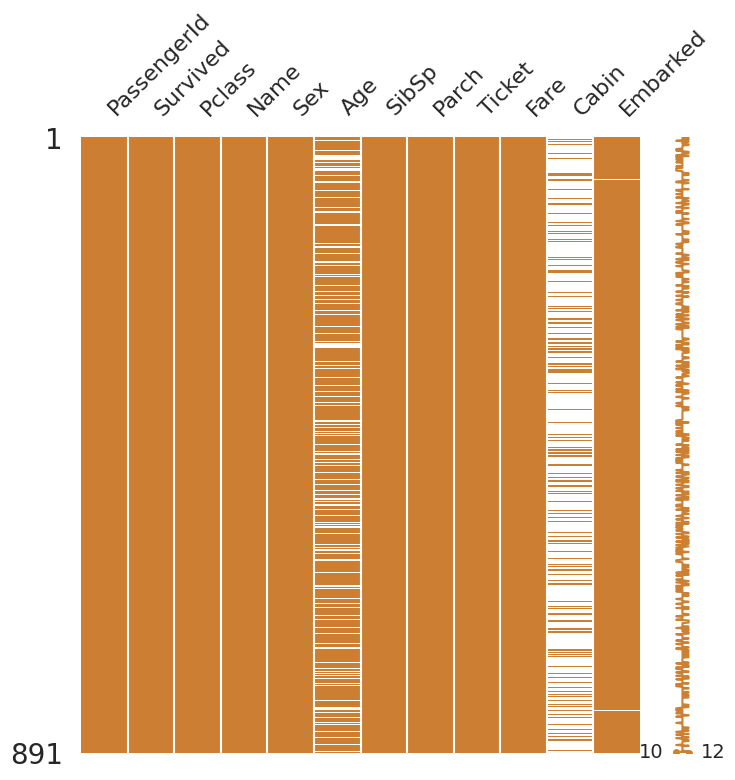

In [39]:
msno.matrix(df=df_train.iloc[:, :], figsize = (8,8), color=(0.8, 0.5, 0.2)) 


#### 아래와 같이 matrix가 아닌 bar를 이용해서도 dataset의 구성을 시각화할 수 있다.

<Axes: >

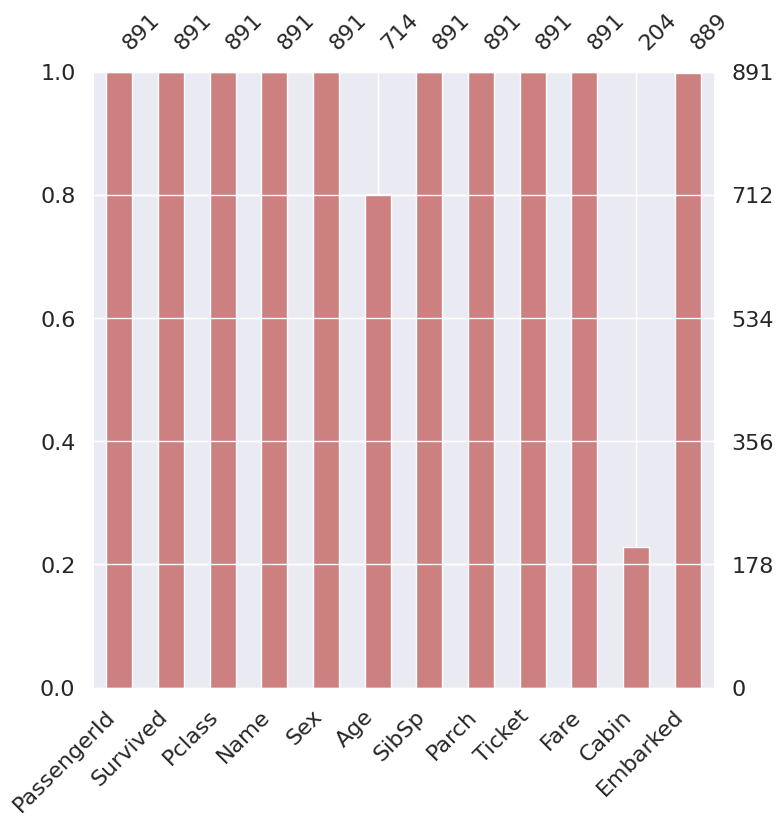

In [40]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.5))

In [ ]:
print("깃허브 활동기록이 업데이트가 안되는 현상이 발생해서 해결하는 중...6")